Lest do soft margin svm first

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import sklearn.datasets
mnist = sklearn.datasets.load_digits()
X = mnist.data
y = mnist.target
Xp = []
yp = []
for i in range(0,y.shape[0]):
    if (y[i] == 2) or (y[i] == 3) or (y[i] == 7):
        yp.append(y[i])
        Xp.append(X[i,:])
Xp = np.asarray(Xp)
X_train, X_test, y_train, y_test = train_test_split(Xp, yp, test_size=0.2, random_state=0, shuffle=1)
parameters = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
svc = SVC(gamma='scale', kernel='linear', decision_function_shape='ovr')
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print("best C is:")
print(clf.best_params_)
y_hat = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_hat, normalize=True)
y_hat = clf.predict(X_train)
acc_train = accuracy_score(y_train, y_hat, normalize=True)
print("train accuracy is: %f" %acc_train)
print("test accuracy is: %f" %acc_test)


best C is:
{'C': 0.001}
train accuracy is: 0.997680
test accuracy is: 0.990741


In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import sklearn.datasets
mnist = sklearn.datasets.load_digits()
X = mnist.data
y = mnist.target
Xp = []
yp = []
for i in range(0,y.shape[0]):
    if (y[i] == 2) or (y[i] == 3) or (y[i] == 7):
        yp.append(y[i])
        Xp.append(X[i,:])

Xp = np.asarray(Xp)
X_train, X_test, y_train, y_test = train_test_split(Xp, yp, test_size=0.2, random_state=0, shuffle=1)
parameters = {'C': [0.0001, 0.001, 0.01, 0.1,.5, 1,2,3, 10, 100],'gamma':[0.000001,.001,.005,.01,.05,.1,.5,1,5,10,20]}
svc = SVC( kernel='rbf', decision_function_shape='ovr')#ovr is one versus all#
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print("best C and gamma are:")
print(clf.best_params_)
y_hat = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_hat, normalize=True)
y_hat = clf.predict(X_train)
acc_train = accuracy_score(y_train, y_hat, normalize=True)
print("train accuracy is: %f" %acc_train)
print("test accuracy is: %f" %acc_test)

best C and gamma are:
{'C': 0.5, 'gamma': 0.001}
train accuracy is: 1.000000
test accuracy is: 0.990741


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Firstly i used DML package in order to implement local linear discriminant analysis

In [28]:
!pip install pyDML

     |████████████████████████████████| 61kB 2.2MB/s 
  Created wheel for pyDML: filename=pyDML-0.1.0-cp36-cp36m-linux_x86_64.whl size=4107022 sha256=842db46c02796601fd74bd3d32201802dcb8c892432dd6ccc7fec7ae1872b49f
  Stored in directory: /root/.cache/pip/wheels/ec/db/2d/1e92009f30bd22aa812166ddcbfc178f6c2d9c82fab60f1113
Successfully built pyDML


In [32]:
import dml
from dml import tune,llda,cross_validate,classifier_plot,dml_plot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import sklearn.datasets
mnist = sklearn.datasets.load_digits()
X = mnist.data
y = mnist.target
Xp = []
yp = []
for i in range(0,y.shape[0]):
    if (y[i] == 2) or (y[i] == 3) or (y[i] == 7):
        yp.append(y[i])
        Xp.append(X[i,:])

Xp = np.asarray(Xp)
X_train, X_test, y_train, y_test = train_test_split(Xp, yp, test_size=0.2, random_state=0, shuffle=1)
gam=[0.000001,.00001,.0001,.001,.005,.01,.05,.1,.5,1,5,10,20]
# for i in gamma:
clas=dml.llda.KLLDA(kernel='rbf',gamma=gam[2])
clas.fit(X_train,y_train)
meta = clas.metadata()
print(meta)


{'num_dims': 64, 'acum_eig': 0.9975602429526055}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Variables are collinear.


LDA without PCA on data

In [0]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import sklearn.datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
mnist = sklearn.datasets.load_digits()
X = mnist.data
y = mnist.target
Xp = []
yp = []
for i in range(0,y.shape[0]):
    if (y[i] == 2) or (y[i] == 3) or (y[i] == 7):
        yp.append(y[i])
        Xp.append(X[i,:])

Xp = np.asarray(Xp)
X_train, X_test, y_train, y_test = train_test_split(Xp, yp, test_size=0.2, random_state=0, shuffle=1)
X=sklearn.metrics.pairwise.rbf_kernel(X_train,X_test[0,:].reshape(1,-1) ,gamma=.001)
a=np.copy(X_train)
for i in range(431):
  a[i,:]*=X[i]
model=LinearDiscriminantAnalysis()
model.fit(a,y_train)
print('accuracy for LDA is',model.score(X_test,y_test))

accuracy for LDA is 0.9444444444444444


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


**Firstly pca transformation is done seperately on train and test as we should not use test set in training procedure.
after that for each test sample,one train data matrix is formed by using rbf kernel that for each test smple we compute the rbf kernel between this sample and every train sample and then we form the new maatrix and then we use lda from scikit for the new data matrix and then we predict the corresponding x_test accuracy and alos we tune the kernel parameter by cross validation which here is .0001 ** 

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn

0.9351851851851852


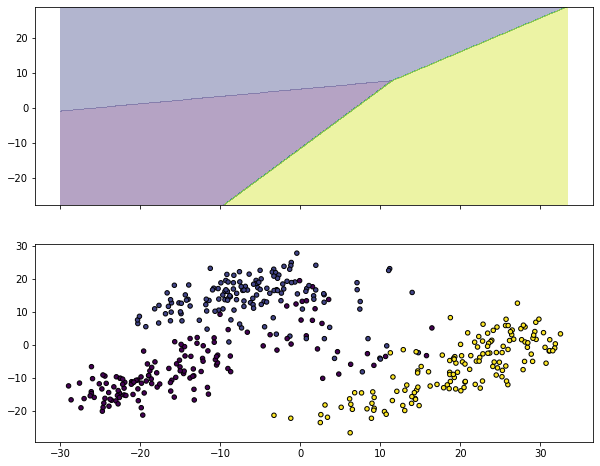

In [26]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import sklearn.datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
mnist = sklearn.datasets.load_digits()
X = mnist.data
y = mnist.target
Xp = []
yp = []
for i in range(0,y.shape[0]):
    if (y[i] == 2) or (y[i] == 3) or (y[i] == 7):
        yp.append(y[i])
        Xp.append(X[i,:])

Xp = np.asarray(Xp)
X_train, X_test, y_train, y_test = train_test_split(Xp, yp, test_size=0.2, random_state=0, shuffle=1)
pca = PCA(n_components=2)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)
d=[]
pre=[]
c=[]
gam=[.00001,.00004,.00008,.0001,.0005,.0008,.001,.005,.01]
q=0
for j in range(len(y_test)):
  X=sklearn.metrics.pairwise.rbf_kernel(X_train_new,X_test_new[j,:].reshape(1,-1) ,gamma=gam[q])
  a=np.copy(X_train_new)
  for i in range(431):
    a[i,:]*=X[i]
  d.append(a)
  model=LinearDiscriminantAnalysis()
  cv = KFold(n_splits=5, shuffle=True, random_state=0)
  model.fit(d[j],y_train)
  nested_score = cross_val_score(model, X_test, y=y_test, cv=cv)
  c.append(nested_score.mean())
  pre.append(model.predict(X_test_new[j,:].reshape(1,-1)))
print(accuracy_score(y_test, pre))

x_min, x_max = X_train_new[:, 0].min() - 1, X_train_new[:, 0].max() + 1
y_min, y_max = X_train_new[:, 1].min() - 1, X_train_new[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 1, sharex='col', sharey='row', figsize=(10, 8))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr[0].contourf(xx, yy, Z, alpha=0.4)
axarr[1].scatter(X_train_new[:, 0], X_train_new[:, 1], c=y_train,
                              s=20, edgecolor='k')

plt.show()


In [0]:
f.append(accuracy_score(y_test, pre))


In [0]:
print(f)

[0.9907407407407407, 0.9907407407407407, 0.9907407407407407, 0.9907407407407407, 0.9907407407407407, 0.8240740740740741, 0.6388888888888888, 0.12037037037037036, 0.1574074074074074, 0.7037037037037037]


In [0]:
print(len(y_test))
    model=LinearDiscriminantAnalysis()
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    model.fit(d[j],y_train)
    pre.append(model.predict(X_test[j,:].reshape(1,-1)))
  nested_score = cross_val_score(model, X_test, y=y_test, cv=cv)
  c.append(nested_score.mean())
  m.append(accuracy_score(y_test, pre))
print(np.argmax(m))
gammaa=[.00001,.00004,.00008,.0001,.0005,.0008,.001,.005,.01,.1,.5,1,5,10,20,40,80,100]

108
